In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical


In [2]:
# Load dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Normalize the images to a range of 0 to 1 by dividing by 255
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Reshape the data to add a channel dimension (required for CNN)
train_images = np.expand_dims(train_images, -1)
test_images = np.expand_dims(test_images, -1)

# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


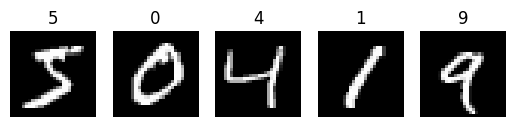

In [3]:
# Visualize the first 5 images and labels
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(train_images[i].reshape(28, 28), cmap='gray')
    plt.title(np.argmax(train_labels[i]))
    plt.axis('off')
plt.show()


In [4]:
# Build the model
model = models.Sequential()

# Convolutional layer 1
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

# Convolutional layer 2
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Convolutional layer 3
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten the output from 2D to 1D
model.add(layers.Flatten())

# Fully connected layers (Dense layers)
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


d:\mnist\mnist\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [6]:
# Train the model with training data
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - accuracy: 0.8695 - loss: 0.4147 - val_accuracy: 0.9819 - val_loss: 0.0589
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.9827 - loss: 0.0555 - val_accuracy: 0.9874 - val_loss: 0.0360
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.9890 - loss: 0.0354 - val_accuracy: 0.9898 - val_loss: 0.0301
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.9911 - loss: 0.0287 - val_accuracy: 0.9900 - val_loss: 0.0320
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.9932 - loss: 0.0211 - val_accuracy: 0.9895 - val_loss: 0.0321


In [7]:
# Evaluate the model using test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9857 - loss: 0.0447
Test accuracy: 0.9894999861717224


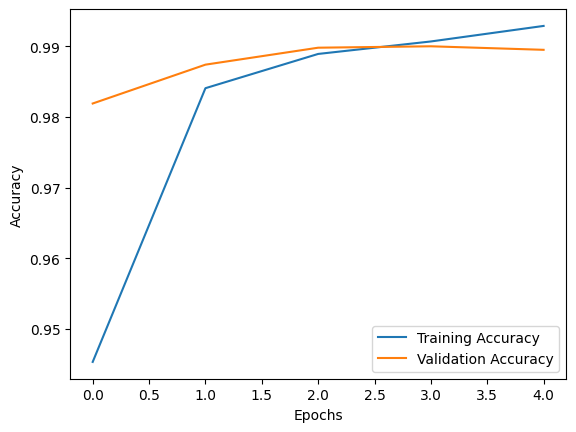

In [8]:
# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [9]:
# Test prediction on a single image
pred = model.predict(np.expand_dims(test_images[0], axis=0))
print(f'Predicted label: {np.argmax(pred)}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
Predicted label: 7


In [10]:
# Save the model
model.save('mnist_digit_classifier.h5')
